## GITHUB LINK :  https://github.com/Pujya6267/21BDS0372_EDA_Theory_DA/tree/main

## EXPLORATORY DATA ANALYSIS
## THEORY DIGITAL ASSIGNMENT

### PUJYA JAIN
### 21BDS0372

#### Question) Procedure to Follow:

1. Load the Dataset and explore Dimension, Summary, Data Handling, Data Cleaning, Univariate, Bivariate and Multivariate Analysis (Maximum of all the possibilities). 

2. do statistical analysis on the data. 

3.Estimation of missing data, global methods, class-based methods, multiple imputation methods etc.,  

4.Use statistical techniques to identify outlier data for the given data set.

5. find covariance and correlation using functions.

6. and as many more operations as feels relevant.

#### 1) Load the Data and Basic Exploration

In [62]:
import pandas as pd

data = pd.read_csv('SuicideChina.csv')
print("\nFirst Five Rows:\n", data.head())


First Five Rows:
    rownames  Person_ID Hospitalised Died Urban  Year  Month     Sex  Age  \
0         1          1          yes   no    no  2010     12  female   39   
1         2          2           no  yes    no  2009      3    male   83   
2         3          3           no  yes    no  2010      2    male   60   
3         4          4           no  yes    no  2011      1    male   73   
4         5          5          yes   no    no  2009      8    male   51   

   Education Occupation        method  
0  Secondary  household  Other poison  
1    primary    farming       Hanging  
2    primary    farming       Hanging  
3    primary    farming       Hanging  
4  Secondary    farming     Pesticide  


In [31]:
print("Data Shape:", data.shape)

Data Shape: (765, 13)


In [32]:
print("Column Names:", data.columns)

Column Names: Index(['rownames', 'state', 'year', 'miles', 'fatalities', 'seatbelt',
       'speed65', 'speed70', 'drinkage', 'alcohol', 'income', 'age',
       'enforce'],
      dtype='object')


In [33]:
print("\nData Types:\n", data.dtypes)


Data Types:
 rownames        int64
state          object
year            int64
miles           int64
fatalities    float64
seatbelt      float64
speed65        object
speed70        object
drinkage       object
alcohol        object
income          int64
age           float64
enforce        object
dtype: object


In [34]:
print("\nMissing Values:\n", data.isnull().sum())


Missing Values:
 rownames        0
state           0
year            0
miles           0
fatalities      0
seatbelt      209
speed65         0
speed70         0
drinkage        0
alcohol         0
income          0
age             0
enforce         0
dtype: int64


#### 2)Data Cleaning and Imputation We found that seatbelt had missing values, which we imputed with the mean:

In [35]:
# Calculate missing values percentage
missing_percentage = (data.isnull().sum() / len(data)) * 100
print("Missing Values (Percentage):\n", missing_percentage)

Missing Values (Percentage):
 rownames       0.000000
state          0.000000
year           0.000000
miles          0.000000
fatalities     0.000000
seatbelt      27.320261
speed65        0.000000
speed70        0.000000
drinkage       0.000000
alcohol        0.000000
income         0.000000
age            0.000000
enforce        0.000000
dtype: float64


In [61]:
# Impute missing values in 'seatbelt' using mean as an example
# Create a copy of the DataFrame to avoid chained assignment issues
data = data.copy()

# Impute missing values in 'seatbelt' using the mean
data['seatbelt'] = data['seatbelt'].fillna(data['seatbelt'].mean())

# Check for remaining missing values
print(data.isnull().sum())

rownames      0
state         0
year          0
miles         0
fatalities    0
seatbelt      0
speed65       0
speed70       0
drinkage      0
alcohol       0
income        0
age           0
enforce       0
miles_log     0
dtype: int64


#### 3. Univariate Analysis with Additional Statistical Details


miles Summary:
Mean: 41447.734640522875
Median: 30319.0
Skewness: 2.6111023792585244
Kurtosis: 9.063223045992348
Unique Values: 758


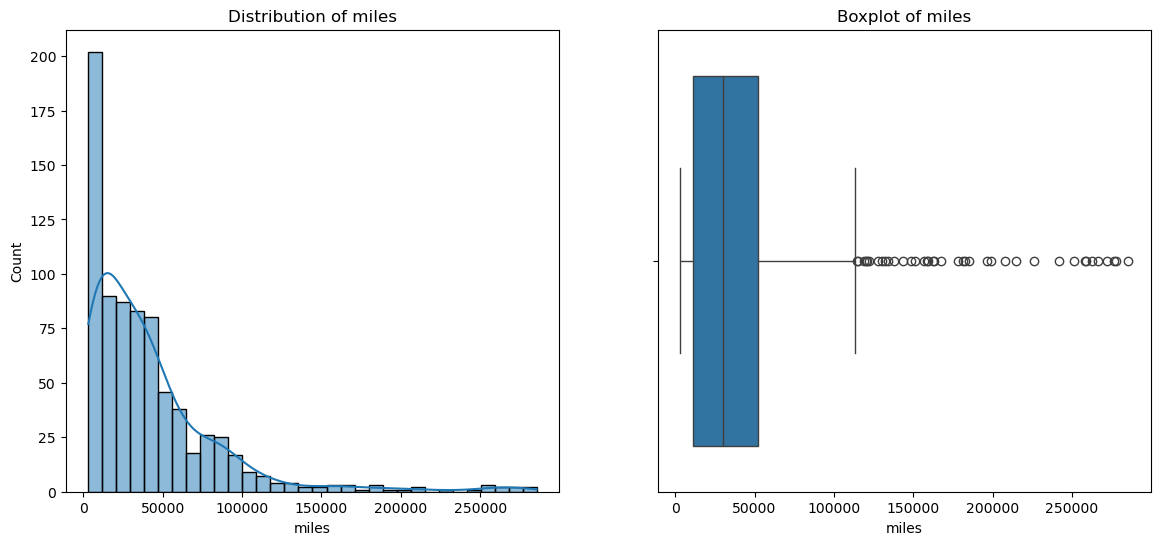


fatalities Summary:
Mean: 0.02148951477572025
Median: 0.021198958158493
Skewness: 0.7600253235279069
Kurtosis: 0.8113551489655251
Unique Values: 765


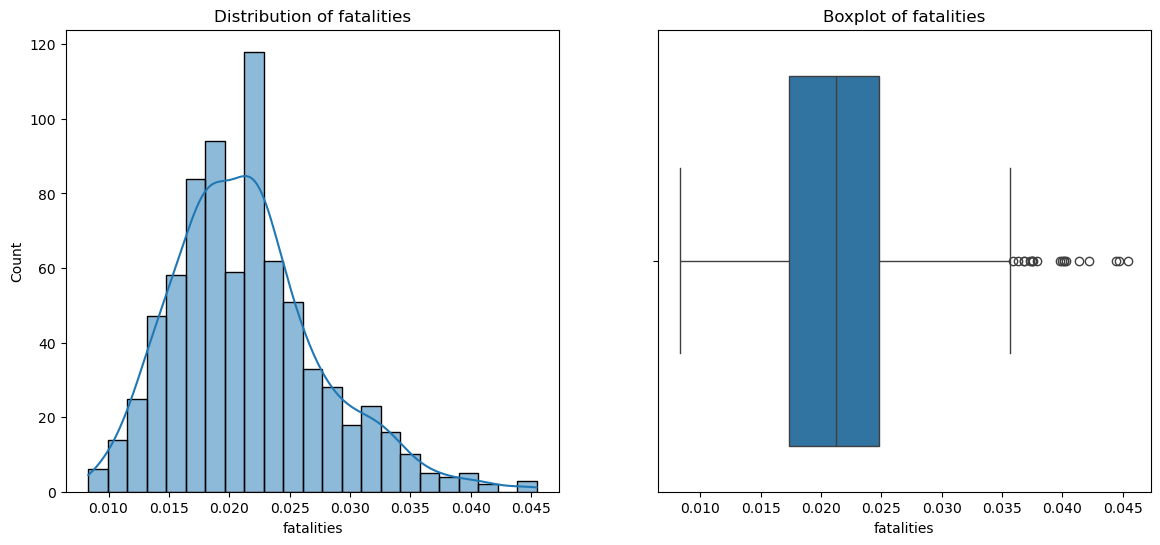


seatbelt Summary:
Mean: 0.528851797207922
Median: 0.528851797207922
Skewness: -0.5507606490101725
Kurtosis: 0.6626158077152864
Unique Values: 246


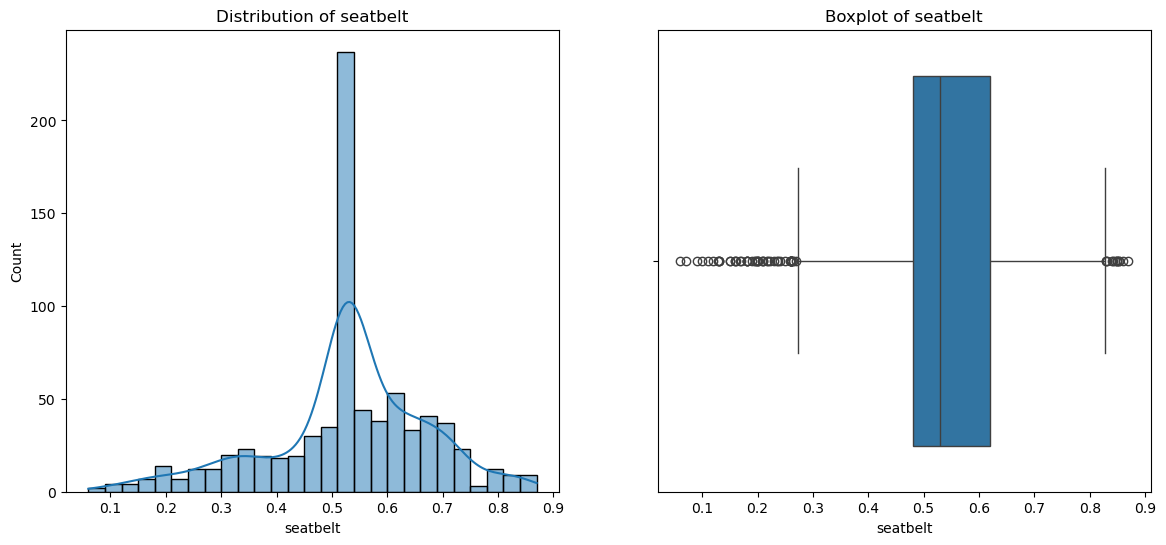


income Summary:
Mean: 17992.586928104574
Median: 17624.0
Skewness: 0.5777915492689545
Kurtosis: 0.2105946820100839
Unique Values: 750


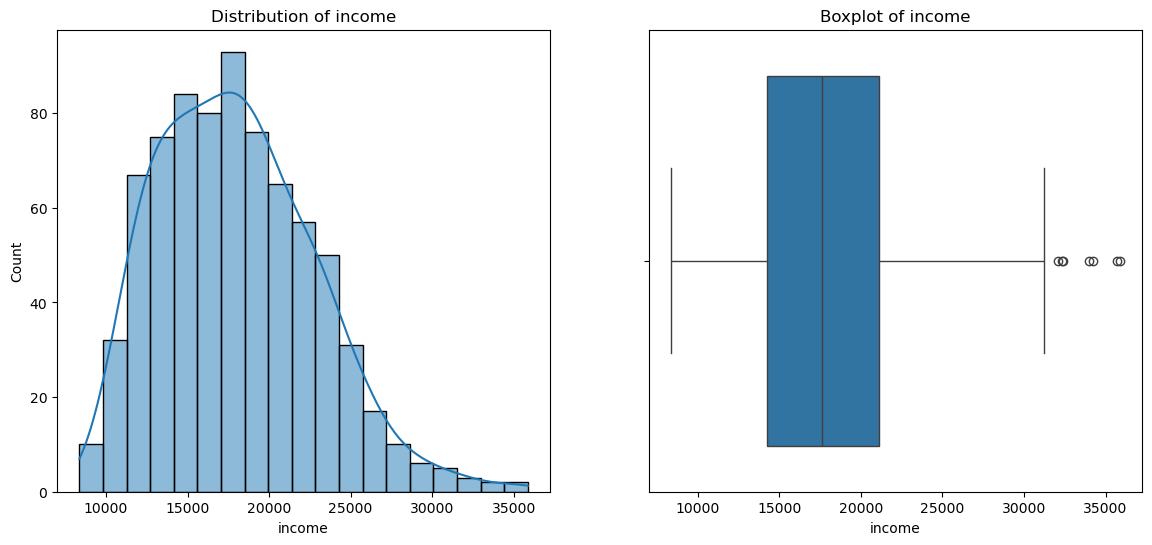


age Summary:
Mean: 35.13719353270687
Median: 35.39176559448242
Skewness: -1.1495976096228606
Kurtosis: 2.9703837051798776
Unique Values: 764


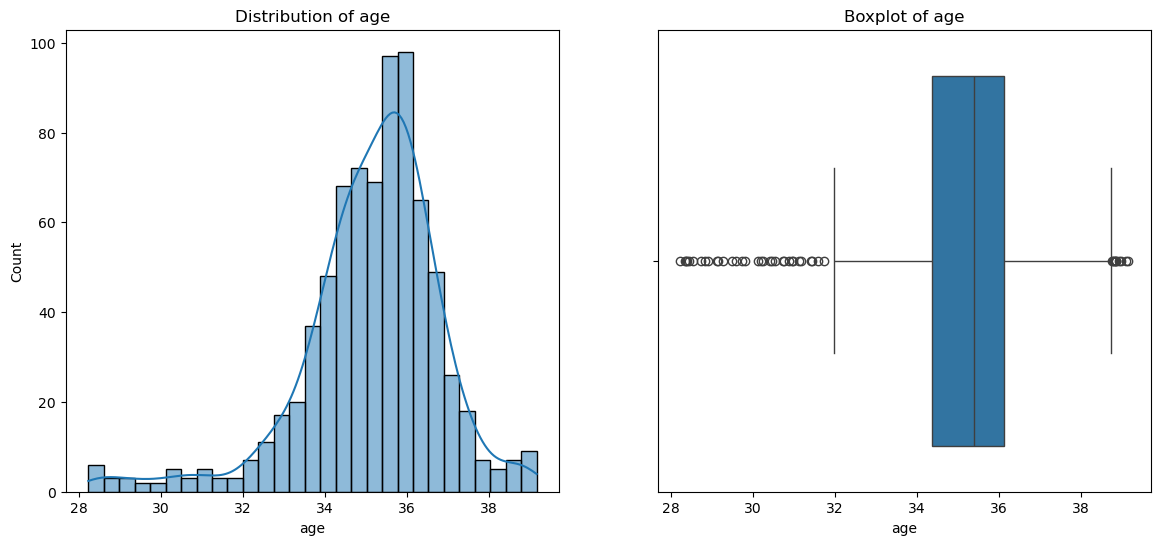

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_columns = ['miles', 'fatalities', 'seatbelt', 'income', 'age']

for column in numerical_columns:
    print(f"\n{column} Summary:")
    print(f"Mean: {data[column].mean()}")
    print(f"Median: {data[column].median()}")
    print(f"Skewness: {data[column].skew()}")
    print(f"Kurtosis: {data[column].kurt()}")
    print(f"Unique Values: {data[column].nunique()}")
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')
    plt.show()


#### 4. Bivariate and Multivariate Analysis

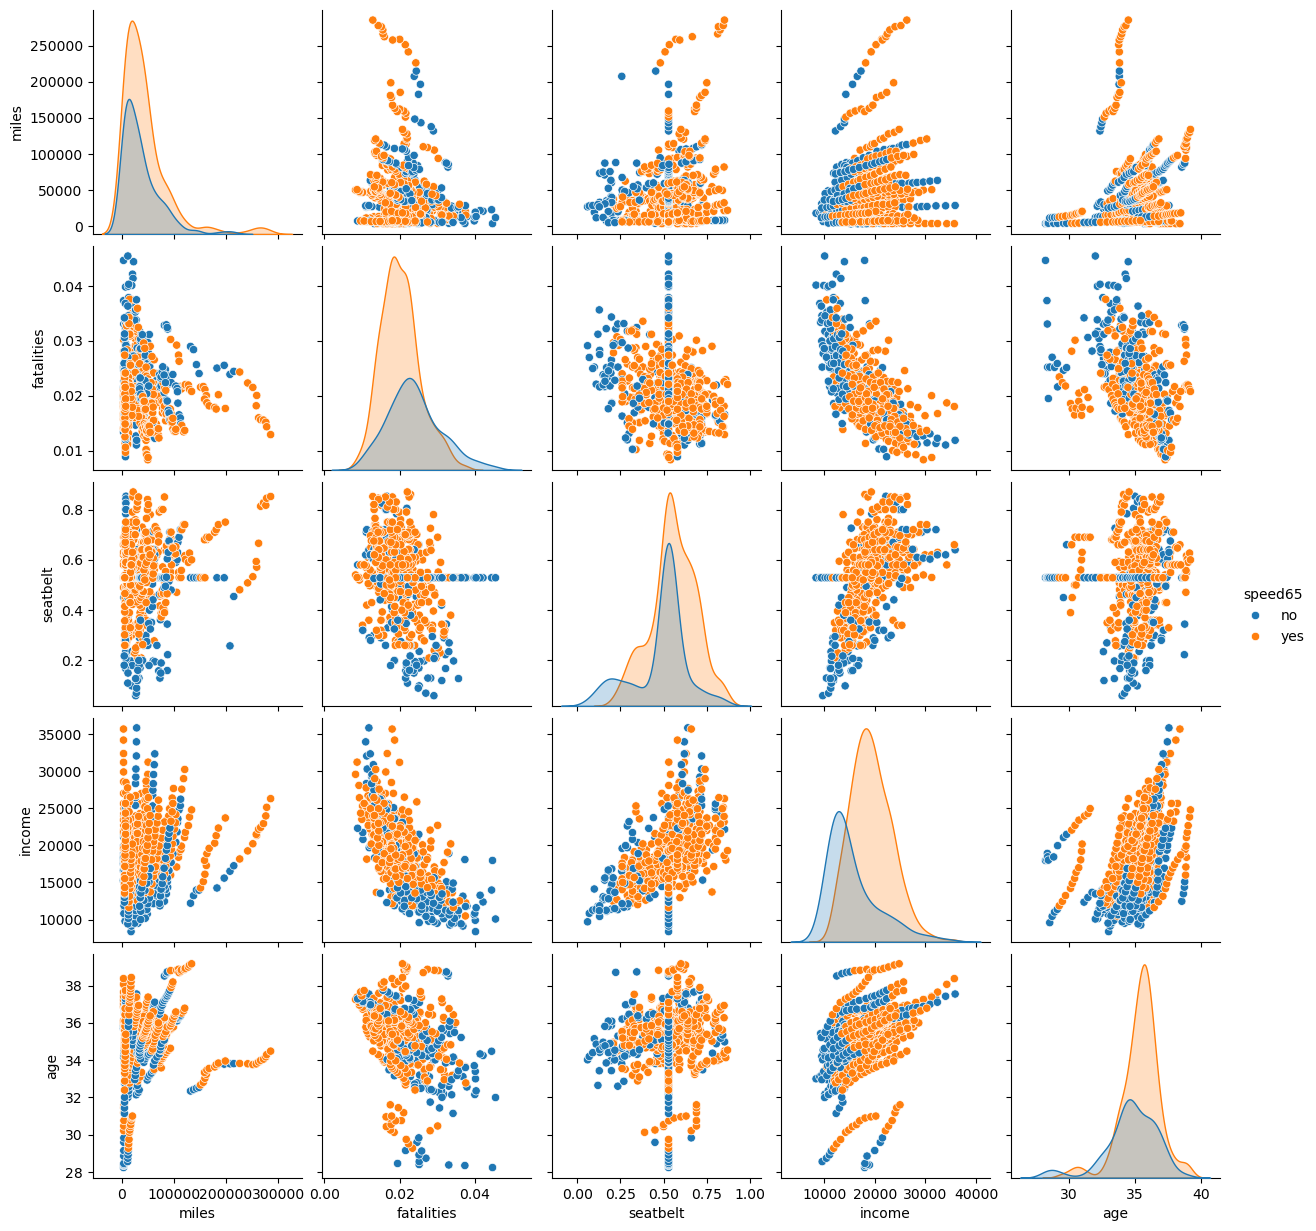

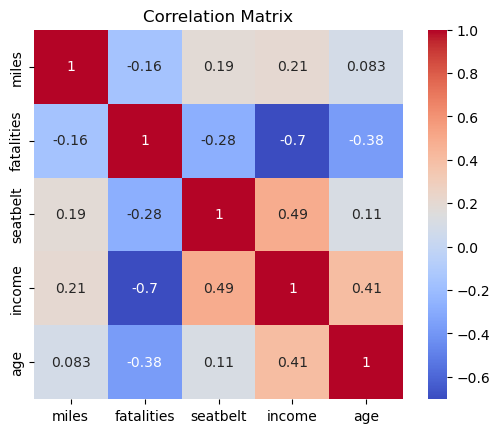

In [38]:
# Pairplot for bivariate analysis with 'speed65' as a hue
sns.pairplot(data, vars=numerical_columns, hue='speed65')
plt.show()

# Correlation matrix heatmap
correlation_matrix = data[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title("Correlation Matrix")
plt.show()

#### 5. Outlier Detection Using Multiple Methods

In [39]:
from scipy import stats

# IQR method for outlier detection
def detect_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    outliers = column[((column < (Q1 - 1.5 * IQR)) | (column > (Q3 + 1.5 * IQR)))]
    return outliers

for column in numerical_columns:
    print(f"\nOutliers in {column} using IQR method:")
    print(detect_outliers_iqr(data[column]))

# Z-score method for outlier detection
z_scores = stats.zscore(data[numerical_columns])
abs_z_scores = abs(z_scores)
outliers_z = (abs_z_scores > 3).any(axis=1)  # Outliers where any Z-score > 3
print("\nNumber of Outliers (Z-score method):", outliers_z.sum())


Outliers in miles using IQR method:
60     182652
61     196537
62     207600
63     214913
64     226301
65     241575
66     251482
67     258926
68     257976
69     262548
70     266408
71     271943
72     276371
73     278043
74     285612
144    114311
145    120467
146    121989
147    127801
148    130004
149    134007
522    115091
523    118641
524    120778
645    131883
646    137737
647    143263
648    148348
649    151186
650    156458
651    159512
652    162232
653    158756
654    163329
655    167611
656    178348
657    181096
658    185386
659    198700
Name: miles, dtype: int64

Outliers in fatalities using IQR method:
0      0.044669
1      0.037336
46     0.042158
47     0.041381
48     0.044430
375    0.040164
376    0.036818
378    0.040102
379    0.037476
390    0.039827
480    0.045470
481    0.039977
482    0.040320
483    0.037886
484    0.037576
495    0.036816
603    0.037487
604    0.035932
735    0.036337
Name: fatalities, dtype: float64

Outliers in

#### 6. Covariance and Correlation Calculations with Interpretation

In [40]:
# Covariance Matrix
covariance_matrix = data[numerical_columns].cov()
print("Covariance Matrix:\n", covariance_matrix)

# Correlation Matrix
correlation_matrix = data[numerical_columns].corr()
print("Correlation Matrix:\n", correlation_matrix)

# Interpretation: look for strong correlations
print("\nHighly Correlated Pairs (Threshold > 0.6):")
high_corr = correlation_matrix[(correlation_matrix > 0.6) & (correlation_matrix < 1)]
print(high_corr.dropna(how='all').dropna(axis=1, how='all'))


Covariance Matrix:
                    miles  fatalities     seatbelt        income          age
miles       1.932657e+09  -43.779000  1188.702267  4.360538e+07  6230.376557
fatalities -4.377900e+01    0.000038    -0.000250 -2.089069e+01    -0.003934
seatbelt    1.188702e+03   -0.000250     0.021040  3.403379e+02     0.028292
income      4.360538e+07  -20.890689   340.337944  2.315014e+07  3329.698388
age         6.230377e+03   -0.003934     0.028292  3.329698e+03     2.883650
Correlation Matrix:
                miles  fatalities  seatbelt    income       age
miles       1.000000   -0.161366  0.186411  0.206151  0.083458
fatalities -0.161366    1.000000 -0.279736 -0.703558 -0.375413
seatbelt    0.186411   -0.279736  1.000000  0.487652  0.114860
income      0.206151   -0.703558  0.487652  1.000000  0.407527
age         0.083458   -0.375413  0.114860  0.407527  1.000000

Highly Correlated Pairs (Threshold > 0.6):
Empty DataFrame
Columns: []
Index: []


#### 7. Additional Operations
Skewness and Transformation: Apply transformations if features are skewed (e.g., log transformation for positive skew).

Categorical Encoding: Convert categorical variables to numerical values for further analysis.

Feature Engineering: Create new features based on existing columns, such as ratios or interaction terms.

In [41]:
# Skewed feature transformation (example: log transformation for 'miles')
import numpy as np

if data['miles'].skew() > 0.5:
    data['miles_log'] = np.log1p(data['miles'])  # log1p handles zero values better
    print("Applied log transformation on 'miles'")

# Categorical encoding
data_encoded = pd.get_dummies(data, columns=['speed65', 'speed70', 'drinkage', 'alcohol', 'enforce'])

print("Encoded Data Columns:\n", data_encoded.columns)


Applied log transformation on 'miles'
Encoded Data Columns:
 Index(['rownames', 'state', 'year', 'miles', 'fatalities', 'seatbelt',
       'income', 'age', 'miles_log', 'speed65_no', 'speed65_yes', 'speed70_no',
       'speed70_yes', 'drinkage_no', 'drinkage_yes', 'alcohol_no',
       'alcohol_yes', 'enforce_no', 'enforce_primary', 'enforce_secondary'],
      dtype='object')


#### 8. Advanced Imputation Techniques

In [44]:
from scipy.stats import ttest_ind

# Example: T-test between 'speed65' categories for 'fatalities'
fatalities_yes = data[data['speed65'] == 'yes']['fatalities']
fatalities_no = data[data['speed65'] == 'no']['fatalities']

t_stat, p_val = ttest_ind(fatalities_yes, fatalities_no)
print(f"T-test between speed65 'yes' and 'no': T-Statistic = {t_stat}, P-Value = {p_val}")


T-test between speed65 'yes' and 'no': T-Statistic = -8.113936105023495, P-Value = 1.956756082051727e-15


#### 9. Data Preprocessing for applying ML models

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Drop rows with missing target column (`seatbelt`) for supervised models
data_cleaned = data.dropna(subset=['seatbelt'])

# Separate numerical and categorical features
numerical_features = ['miles', 'fatalities', 'income', 'age']
categorical_features = ['state', 'speed65', 'speed70', 'drinkage', 'alcohol', 'enforce']

# Encode categorical features
encoder = LabelEncoder()
for col in categorical_features:
    data_cleaned[col] = encoder.fit_transform(data_cleaned[col])

# Scale numerical features
scaler = StandardScaler()
data_cleaned[numerical_features] = scaler.fit_transform(data_cleaned[numerical_features])

# Define features (X) and target (y)
X = data_cleaned[numerical_features + categorical_features]
y = data_cleaned['seatbelt']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check preprocessed data
X_train.head(), y_train.head()


(        miles  fatalities    income       age  state  speed65  speed70  \
 336  0.875015   -0.157899 -0.001162 -0.216020     22        1        0   
 688  0.679537   -1.490081  1.446955  0.423421     45        1        0   
 290  0.042935   -0.771656  0.712186  0.656757     19        0        0   
 687  0.645599   -1.394065  1.237526  0.313560     45        1        0   
 90  -0.473849   -0.041882 -0.493434  0.528608      6        0        0   
 
      drinkage  alcohol  enforce  
 336         1        0        2  
 688         1        1        2  
 290         1        0        0  
 687         1        1        2  
 90          0        0        0  ,
 336    0.467000
 688    0.696000
 290    0.528852
 687    0.702000
 90     0.528852
 Name: seatbelt, dtype: float64)

#### LINEAR REGRESSION

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lr = lin_reg.predict(X_test)

{
    "Linear Regression": {"MSE": lr_mse, "R^2": lr_r2}
}

{'Linear Regression': {'MSE': 0.01606315012019666, 'R^2': 0.1408500034477176}}

#### RANDOM FOREST REGRESSOR

In [54]:
# Random Forest Regressor
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

# Evaluate models
lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_r2 = r2_score(y_test, y_pred_lr)

rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

{
    "Random Forest Regressor": {"MSE": rf_mse, "R^2": rf_r2}
}


{'Random Forest Regressor': {'MSE': 0.008952132765534183,
  'R^2': 0.5211882615120511}}

### RANDOM FOREST CLASSIFIER

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

log_reg = LogisticRegression(random_state=42, max_iter=500)
log_reg.fit(X_train, y_train_class)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train_class)
y_pred_lr_class = log_reg.predict(X_test_scaled)

log_reg = LogisticRegression(random_state=42, solver='saga', max_iter=500)
log_reg.fit(X_train, y_train_class)

{
    "Logistic Regression Accuracy": lr_accuracy
}

C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


{'Logistic Regression Accuracy': 0.7908496732026143}

### LOGISTIC REGRESSION

In [57]:

# Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train_class)
y_pred_rf_class = rf_clf.predict(X_test)

# Evaluate models
lr_accuracy = accuracy_score(y_test_class, y_pred_lr_class)
rf_accuracy = accuracy_score(y_test_class, y_pred_rf_class)

{
    "Random Forest Classifier Accuracy": rf_accuracy,
    "Classification Report (Random Forest)": classification_report(y_test_class, y_pred_rf_class, output_dict=True)
}

{'Random Forest Classifier Accuracy': 0.8954248366013072,
 'Classification Report (Random Forest)': {'0': {'precision': 0.9333333333333333,
   'recall': 0.8936170212765957,
   'f1-score': 0.9130434782608695,
   'support': 94.0},
  '1': {'precision': 0.8412698412698413,
   'recall': 0.8983050847457628,
   'f1-score': 0.8688524590163934,
   'support': 59.0},
  'accuracy': 0.8954248366013072,
  'macro avg': {'precision': 0.8873015873015873,
   'recall': 0.8959610530111792,
   'f1-score': 0.8909479686386315,
   'support': 153.0},
  'weighted avg': {'precision': 0.8978317252827056,
   'recall': 0.8954248366013072,
   'f1-score': 0.8960024969835878,
   'support': 153.0}}}

### NAIVE BAYES CLASSIFIER

In [60]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Gaussian Naive Bayes model
nb_model = GaussianNB()

# Fit the model on the training data
nb_model.fit(X_train_scaled, y_train_class)

# Predict on the test data
y_pred_nb = nb_model.predict(X_test_scaled)

# Evaluate the model
nb_accuracy = accuracy_score(y_test_class, y_pred_nb)
nb_report = classification_report(y_test_class, y_pred_nb)

print("Naive Bayes Accuracy:", nb_accuracy)
print("\nClassification Report for Naive Bayes:\n", nb_report)


Naive Bayes Accuracy: 0.6143790849673203

Classification Report for Naive Bayes:
               precision    recall  f1-score   support

           0       1.00      0.37      0.54        94
           1       0.50      1.00      0.67        59

    accuracy                           0.61       153
   macro avg       0.75      0.69      0.60       153
weighted avg       0.81      0.61      0.59       153

